In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("svaningelgem/crypto-currencies-daily-prices")

100%|██████████| 3.12M/3.12M [00:00<00:00, 3.87MB/s]

Extracting files...


In [ ]:
import os

data_list = os.listdir(path)
df = pd.DataFrame()

for it in data_list:
    name = it.split('.')[0]
    df = pd.concat([df,pd.read_csv(os.path.join(path,it))], axis=0)

In [ ]:
df.head()

,ticker,date,open,high,low,close
0,HBAR,2019-09-20,0.05058,0.05638,0.04986,0.05159
1,HBAR,2019-09-21,0.05159,0.05484,0.04545,0.04814
2,HBAR,2019-09-22,0.04814,0.04858,0.03844,0.03924
3,HBAR,2019-09-23,0.03924,0.03924,0.03403,0.03791
4,HBAR,2019-09-24,0.03791,0.04041,0.02870,0.02947


In [ ]:
df[df['ticker'] == 'BTC']

,ticker,date,open,high,low,close
0,BTC,2010-07-17,0.04951,0.04951,0.04951,0.04951
1,BTC,2010-07-18,0.04951,0.08585,0.04951,0.08584
2,BTC,2010-07-19,0.08584,0.09307,0.07723,0.08080
3,BTC,2010-07-20,0.08080,0.08181,0.07426,0.07474
4,BTC,2010-07-21,0.07474,0.07921,0.06634,0.07921
...,...,...,...,...,...,...
5255,BTC,2024-12-05,98298.20000,104062.00000,93081.30000,96751.80000
5256,BTC,2024-12-06,96789.00000,102079.00000,95560.60000,100648.00000
5257,BTC,2024-12-07,100648.00000,100724.00000,99087.60000,99717.70000
5258,BTC,2024-12-08,99717.70000,100548.00000,98767.20000,100276.00000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Min-max scaling for numerical columns
numeric_columns = ['open', 'high', 'low', 'close']
scaler = MinMaxScaler()

# Group by ticker and scale each group separately
for ticker in df['ticker'].unique():
    mask = df['ticker'] == ticker
    df.loc[mask, numeric_columns] = scaler.fit_transform(df.loc[mask, numeric_columns])


<Axes: >

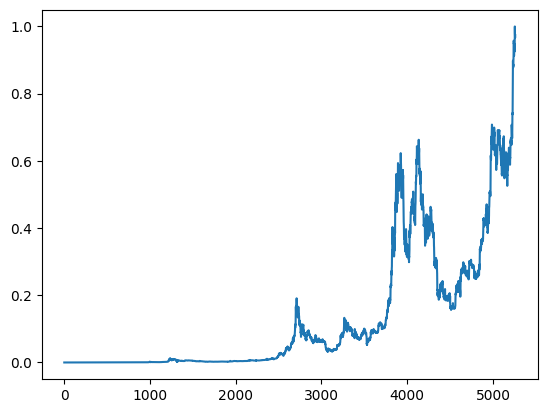

In [ ]:
df[df['ticker'] == 'BTC'].high.plot()

In [ ]:
print('hello')